In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df = pd.read_csv(r"C:\Users\nikes\Downloads\usa_baby_names.csv")
df

,year,first_name,sex,num
0,1920,Mary,F,70982
1,1920,Dorothy,F,36643
2,1920,Helen,F,35097
3,1920,Margaret,F,27994
4,1920,Ruth,F,26101
...,...,...,...,...
12644,2020,Nolan,M,5164
12645,2020,Christian,M,5043
12646,2020,Aaron,M,5039
12647,2020,Cameron,M,5019


In [5]:
df.head(3)

,year,first_name,sex,num
0,1920,Mary,F,70982
1,1920,Dorothy,F,36643
2,1920,Helen,F,35097


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

year          0
first_name    0
sex           0
num           0
dtype: int64

In [14]:
df.shape

(12649, 4)

In [16]:
df.sample(5)

,year,first_name,sex,num
3956,1956,Keith,M,11486
796,1928,Pauline,F,5389
9166,1994,Kenneth,M,5678
4665,1960,Edward,M,16583
12233,2017,Zoey,F,6056


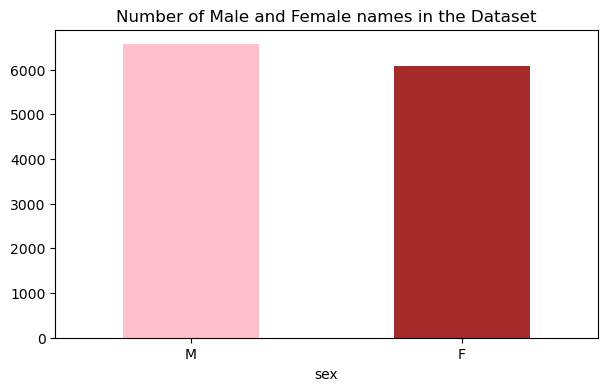

In [22]:
plt.figure(figsize=(7,4))
df['sex'].value_counts().plot(kind='bar',color=['pink','brown'])
plt.xticks(rotation=0)
plt.title('Number of Male and Female names in the Dataset')
plt.show()

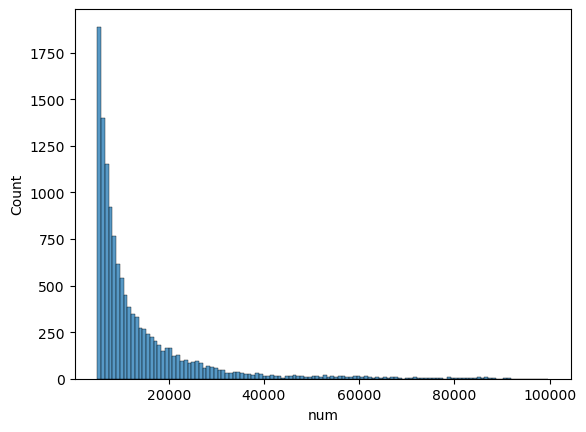

In [23]:
sns.histplot(df["num"])
plt.show()

[]

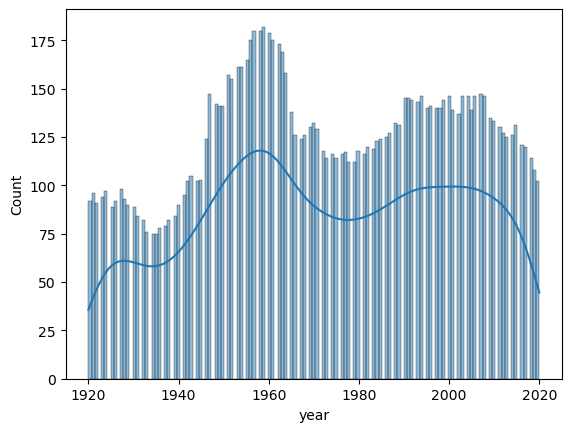

In [24]:
sns.histplot(df['year'],kde=True,bins=143)
plt.plot()

<Axes: xlabel='first_name'>

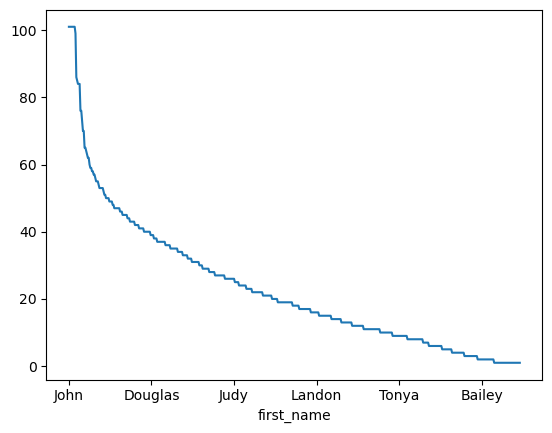

In [26]:
df['first_name'].value_counts().plot()

In [28]:
df[['year','num']].corr()

,year,num
year,1.000000,-0.132631
num,-0.132631,1.000000


In [30]:
total_births_by_year = df.groupby('year').agg(['sum'])['num']
total_births_by_year.shape

(101, 1)

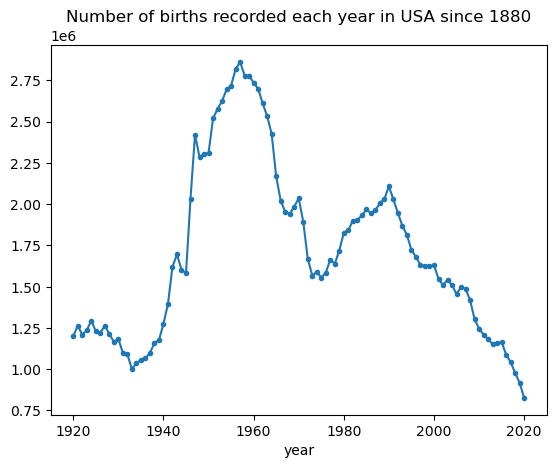

In [31]:
total_births_by_year.plot(marker='.')
plt.title('Number of births recorded each year in USA since 1880')
plt.legend().remove()

In [32]:
year_with_max_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.max()[0]].index[0]
year_with_min_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.min()[0]].index[0]

C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\917689492.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_with_max_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.max()[0]].index[0]
C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\917689492.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year_with_min_birth = total_births_by_year[total_births_by_year['sum'] == total_births_by_year.min()[0]].index[0]


In [33]:
print('Year with max births is ',year_with_max_birth)
print('Year with min births is ',year_with_min_birth)

Year with max births is  1957
Year with min births is  2020


In [35]:
gender_breakdown = df.groupby(['year', 'sex'])['num'].sum().unstack(fill_value=0)
gender_breakdown

sex,F,M
year,,
1920,600217,600754
1921,638111,625972
1922,596728,612026
1923,610264,626011
1924,646308,648526
...,...,...
2016,374098,713483
2017,368138,674032
2018,344614,632503


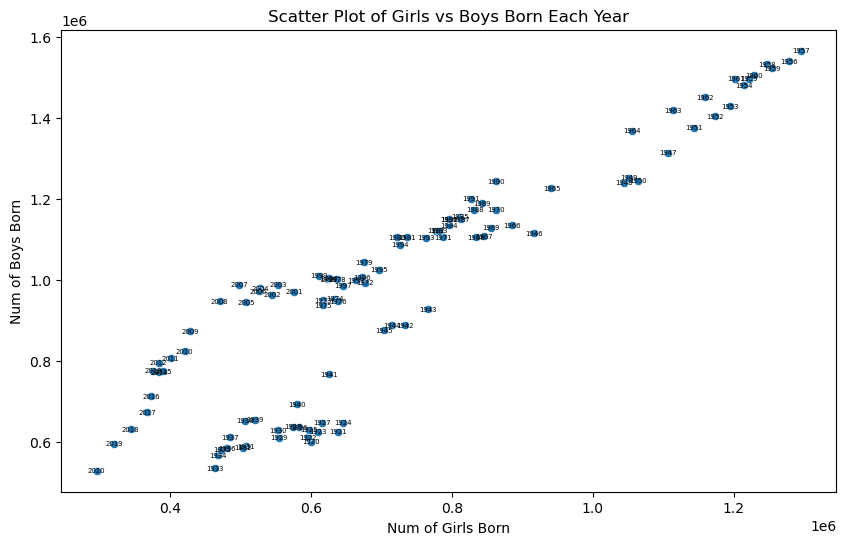

In [36]:
gender_breakdown = gender_breakdown.reset_index()
gender_breakdown.columns = ['year', 'girl', 'boy']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='girl', y='boy', data=gender_breakdown)

# Annotate points with the year
for i in range(gender_breakdown.shape[0]):
    plt.text(gender_breakdown['girl'].iloc[i] + 50, gender_breakdown['boy'].iloc[i] + 50, 
             gender_breakdown['year'].iloc[i], 
             fontsize=5, ha='center', va='center')

plt.title('Scatter Plot of Girls vs Boys Born Each Year')
plt.xlabel('Num of Girls Born')
plt.ylabel('Num of Boys Born')
plt.show()


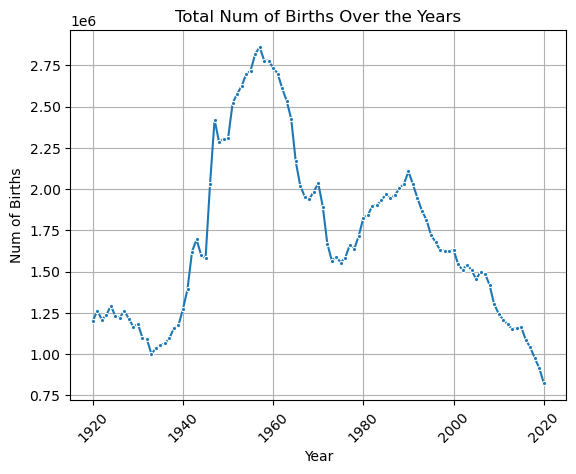

In [39]:
total_births = df.groupby('year')['num'].sum().reset_index()
sns.lineplot(x='year', y='num', data=total_births, marker='.')
plt.title('Total Num of Births Over the Years')
plt.xlabel('Year')
plt.ylabel('Num of Births')
plt.grid()
plt.xticks(rotation=45)
plt.show()

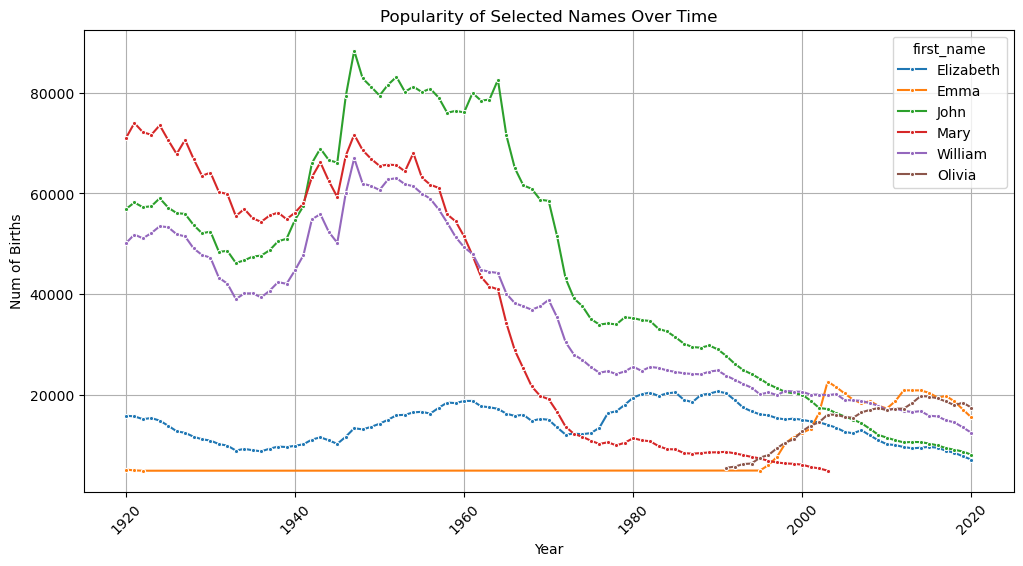

In [42]:
names_to_analyze = ['Mary', 'Emma', 'Olivia', 'Elizabeth', 'John', 'William']
filtered_data = df[df['first_name'].isin(names_to_analyze)]

popularity_over_time = filtered_data.groupby(['year', 'first_name'])['num'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='num', hue='first_name', data=popularity_over_time, marker='.')
plt.title('Popularity of Selected Names Over Time')
plt.xlabel('Year')
plt.ylabel('Num of Births')
plt.legend(title='first_name')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [44]:
grouped_data = df.groupby(['year', 'first_name'])['num'].sum().reset_index()
grouped_data

,year,first_name,num
0,1920,Albert,9997
1,1920,Alfred,5007
2,1920,Alice,11596
3,1920,Ann,5041
4,1920,Anna,14581
...,...,...,...
12619,2020,Victoria,5249
12620,2020,Violet,5075
12621,2020,William,12541
12622,2020,Wyatt,8135


In [46]:
# Get the top 10 names for each year
top_names = grouped_data.groupby('year').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)

C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\2171914841.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names = grouped_data.groupby('year').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)


In [47]:
top_names

,year,first_name,num
0,1920,Mary,70982
1,1920,John,56914
2,1920,William,50148
3,1920,Robert,48678
4,1920,James,47909
...,...,...,...
1005,2020,Ava,13084
1006,2020,Elijah,13034
1007,2020,Charlotte,13003
1008,2020,Sophia,12976


In [48]:
boys_data = df[df['sex'] == 'M']
girls_data = df[df['sex'] == 'F']

top_boys = boys_data.groupby('first_name')['num'].sum().nlargest(10).reset_index()
top_girls = girls_data.groupby('first_name')['num'].sum().nlargest(10).reset_index()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

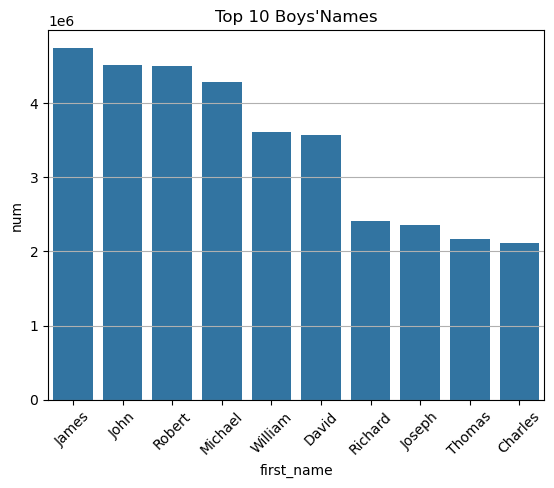

In [50]:
plt.figure()
sns.barplot(top_boys,x='first_name',y='num')
plt.title("Top 10 Boys'Names")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

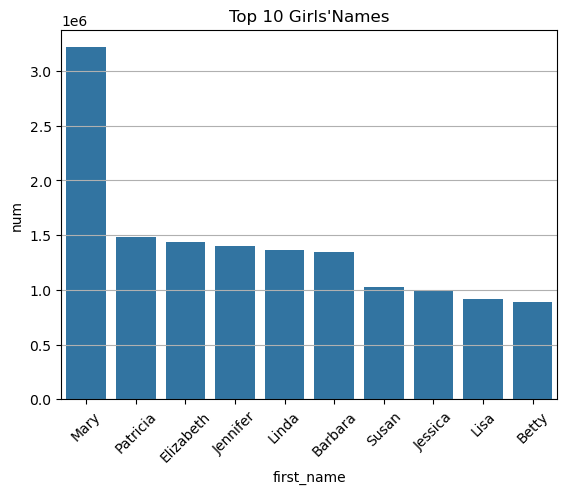

In [52]:
plt.figure()
sns.barplot(top_girls,x='first_name',y='num')
plt.title("Top 10 Girls'Names")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.plot

In [54]:
gender_totals = df.groupby(['year', 'sex'])['num'].sum().unstack(fill_value=0)

# Calculate the birth ratio: boys to girls
gender_totals['birth_ratio'] = gender_totals['M'] / gender_totals['F']
birth_ratios = gender_totals.reset_index()

print('How many boys were born compared to girls')
print(birth_ratios[['year', 'birth_ratio']])

How many boys were born compared to girls
sex  year  birth_ratio
0    1920     1.000895
1    1921     0.980977
2    1922     1.025636
3    1923     1.025804
4    1924     1.003432
..    ...          ...
96   2016     1.907209
97   2017     1.830922
98   2018     1.835396
99   2019     1.856264
100  2020     1.787168

[101 rows x 2 columns]


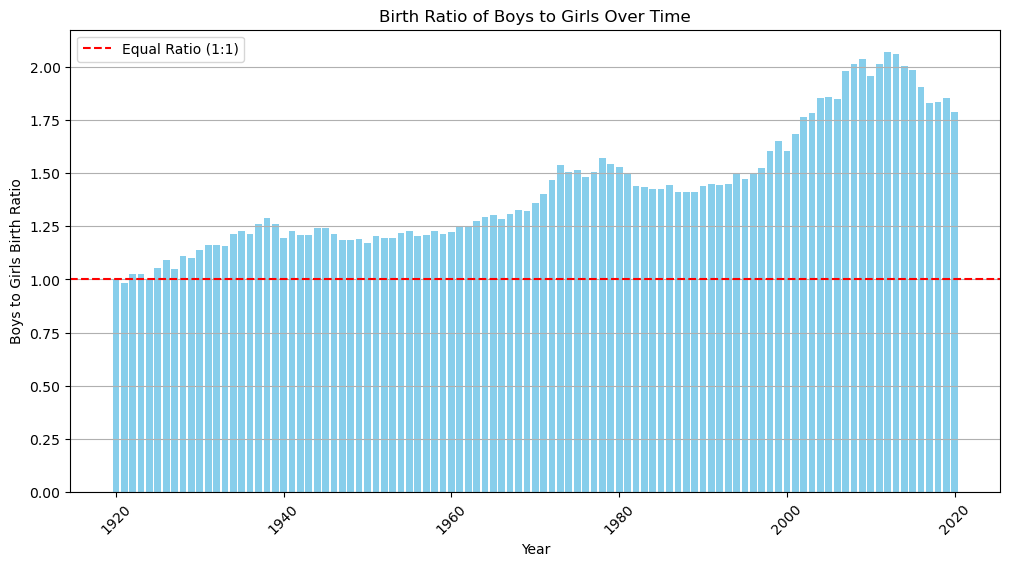

In [56]:
gender_totals = df.groupby(['year', 'sex'])['num'].sum().unstack(fill_value=0)

gender_totals['birth_ratio'] = gender_totals['M'] / gender_totals['F']
gender_totals = gender_totals.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(gender_totals['year'], gender_totals['birth_ratio'], color='skyblue')
plt.title('Birth Ratio of Boys to Girls Over Time')
plt.xlabel('Year')
plt.ylabel('Boys to Girls Birth Ratio')
plt.axhline(1, color='red', linestyle='--', label='Equal Ratio (1:1)')
plt.legend()
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()

In [57]:
df['decade'] = ((df['year'] // 10) * 10).astype(str) + 's'
df.sample(5)

,year,first_name,sex,num,decade
11420,2010,Hunter,M,7322,2010s
2316,1945,Henry,M,6604,1940s
6775,1976,Stephanie,F,15179,1970s
8554,1990,Jordan,M,16133,1990s
56,1920,Joseph,M,25590,1920s


In [60]:
decade_grouped = df.groupby(['decade', 'first_name'])['num'].sum().reset_index()
decade_grouped.sample(5)

,decade,first_name,num
1058,1980s,Kathryn,62444
1410,2000s,Gavin,83745
1451,2000s,Katherine,60914
409,1950s,Cheryl,171382
1264,1990s,Madison,80476


In [62]:
top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)
top_names_by_decade

C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\1679674354.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)


,decade,first_name,num
0,1920s,Mary,701760
1,1920s,Robert,576376
2,1920s,John,564062
3,1920s,James,515308
4,1920s,William,512403
...,...,...,...
105,2020s,Ava,13084
106,2020s,Elijah,13034
107,2020s,Charlotte,13003
108,2020s,Sophia,12976


In [64]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'first_name'])['num'].sum().reset_index()
most_popular_by_decade = decade_grouped.loc[decade_grouped.groupby('decade')['num'].idxmax()]
most_popular_by_decade[['decade', 'first_name', 'num']]

,decade,first_name,num
85,1920,Mary,701760
207,1930,Robert,590774
289,1940,James,795738
458,1950,James,843658
717,1960,Michael,833201
906,1970,Michael,707619
1085,1980,Michael,663830
1275,1990,Michael,462360
1424,2000,Jacob,273911
1596,2010,Emma,194755


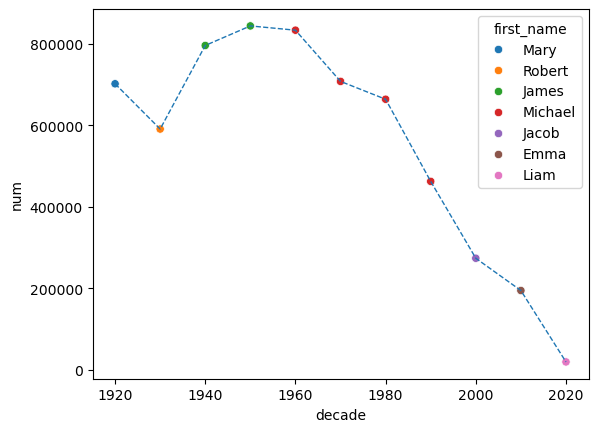

In [66]:
sns.scatterplot(x=most_popular_by_decade['decade'],
                y=most_popular_by_decade['num'],
                hue=most_popular_by_decade['first_name'])
plt.plot(most_popular_by_decade['decade'],
         most_popular_by_decade['num'],
         linewidth=1,
         linestyle='--')

In [68]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'first_name'])['num'].sum().reset_index()

top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)

# Count how many decades each name appears in
name_stability = top_names_by_decade['first_name'].value_counts().reset_index()
name_stability.columns = ['first_name', 'decade_count']

# Display names that have been in the top list for multiple decades
stable_names = name_stability[name_stability['decade_count'] > 1]
stable_names.sample(5)

C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\3401753568.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)


,first_name,decade_count
1,William,7
6,David,5
5,Mary,5
16,Daniel,2
21,Jessica,2


[]

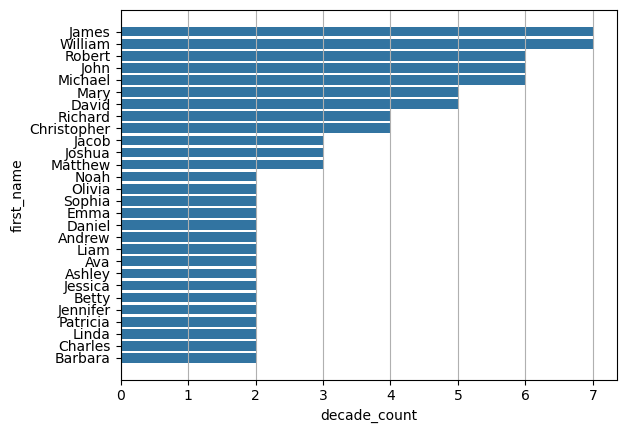

In [70]:
sns.barplot(x=stable_names['decade_count'],y=stable_names['first_name'])
plt.grid(axis='x')
plt.plot()

In [71]:
df['decade'] = (df['year'] // 10) * 10
decade_grouped = df.groupby(['decade', 'first_name'])['num'].sum().reset_index()

top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)

# Find the first and last decade for each name
name_lifespan = top_names_by_decade.groupby('first_name')['decade'].agg(['min', 'max']).reset_index()
name_lifespan.columns = ['first_name', 'first_decade', 'last_decade']

# Calculate the lifespan of popularity
name_lifespan['lifespan'] = name_lifespan['last_decade'] - name_lifespan['first_decade']
name_lifespan_grfeaterthan_20 = name_lifespan[name_lifespan['lifespan']>20].sort_values(by='lifespan',ascending=False)
name_lifespan_grfeaterthan_20

C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\3390169649.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_names_by_decade = decade_grouped.groupby('decade').apply(lambda x: x.nlargest(10, 'num')).reset_index(drop=True)


,first_name,first_decade,last_decade,lifespan
46,William,1920,2010,90
23,James,1920,1980,60
27,John,1920,1970,50
37,Michael,1950,2000,50
44,Robert,1920,1970,50
12,David,1940,1980,40
34,Mary,1920,1960,40
10,Christopher,1970,2000,30
43,Richard,1930,1960,30


[]

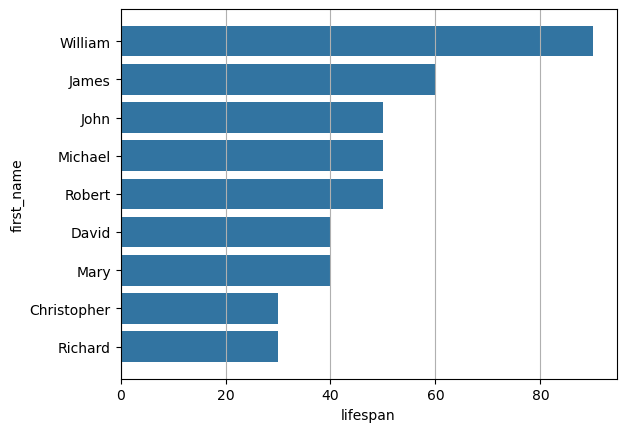

In [72]:
sns.barplot(x=name_lifespan_grfeaterthan_20['lifespan'],y=name_lifespan_grfeaterthan_20['first_name'])
plt.grid(axis='x')
plt.plot()

In [75]:
# List of Most popular names (i.e. top 10 names of each decade)
names = [
    'John', 'William', 'Mary', 'James', 'Charles', 'George', 'Frank',
    'Joseph', 'Anna', 'Thomas', 'Henry', 'Emma', 'Elizabeth',
    'Margaret', 'Ruth', 'Helen', 'Florence', 'Dorothy', 'Robert',
    'Betty', 'Richard', 'Donald', 'Barbara', 'Shirley', 'Patricia',
    'David', 'Linda', 'Michael', 'Deborah', 'Mark', 'Debra', 'Susan',
    'Lisa', 'Kimberly', 'Michelle', 'Christopher', 'Jennifer', 'Jason',
    'Brian', 'Amy', 'Matthew', 'Melissa', 'Joshua', 'Amanda',
    'Jessica', 'Daniel', 'Ashley', 'Andrew', 'Justin', 'Brittany',
    'Tyler', 'Brandon', 'Taylor', 'Jacob', 'Nicholas', 'Austin',
    'Emily', 'Hannah', 'Madison', 'Ethan', 'Anthony', 'Isabella',
    'Jayden', 'Alexander', 'Sophia', 'Olivia', 'Mason', 'Noah', 'Liam',
    'Ava', 'Logan', 'Oliver', 'Elijah', 'Charlotte', 'Amelia'
]

# Define a comprehensive mapping of names to themes
theme_mapping = {
    'John': 'Historical', 'William': 'Historical', 'Mary': 'Nature',
    'James': 'Historical', 'Charles': 'Historical', 'George': 'Historical',
    'Frank': 'Historical', 'Joseph': 'Historical', 'Anna': 'Nature',
    'Thomas': 'Historical', 'Henry': 'Historical', 'Emma': 'Nature',
    'Elizabeth': 'Historical', 'Margaret': 'Historical', 'Ruth': 'Nature',
    'Helen': 'Nature', 'Florence': 'Historical', 'Dorothy': 'Nature',
    'Robert': 'Historical', 'Betty': 'Nature', 'Richard': 'Historical',
    'Donald': 'Historical', 'Barbara': 'Nature', 'Shirley': 'Nature',
    'Patricia': 'Nature', 'David': 'Historical', 'Linda': 'Nature',
    'Michael': 'Historical', 'Deborah': 'Nature', 'Mark': 'Historical',
    'Debra': 'Nature', 'Susan': 'Nature', 'Lisa': 'Nature',
    'Kimberly': 'Nature', 'Michelle': 'Nature', 'Christopher': 'Historical',
    'Jennifer': 'Nature', 'Jason': 'Historical', 'Brian': 'Historical',
    'Amy': 'Virtue', 'Matthew': 'Historical', 'Melissa': 'Nature',
    'Joshua': 'Historical', 'Amanda': 'Nature', 'Jessica': 'Nature',
    'Daniel': 'Historical', 'Ashley': 'Nature', 'Andrew': 'Historical',
    'Justin': 'Historical', 'Brittany': 'Nature', 'Tyler': 'Historical',
    'Brandon': 'Historical', 'Taylor': 'Nature', 'Jacob': 'Historical',
    'Nicholas': 'Historical', 'Austin': 'Historical', 'Emily': 'Nature',
    'Hannah': 'Nature', 'Madison': 'Nature', 'Ethan': 'Historical',
    'Anthony': 'Historical', 'Isabella': 'Nature', 'Jayden': 'Nature',
    'Alexander': 'Historical', 'Sophia': 'Nature', 'Olivia': 'Nature',
    'Mason': 'Historical', 'Noah': 'Historical', 'Liam': 'Historical',
    'Ava': 'Nature', 'Logan': 'Historical', 'Oliver': 'Historical',
    'Elijah': 'Historical', 'Charlotte': 'Nature', 'Amelia': 'Nature',
    'Rose': 'Flowers', 'Daisy': 'Flowers', 'Violet': 'Flowers',
    'Jasmine': 'Flowers', 'Lily': 'Flowers', 'Ivy': 'Nature',
    'Hunter': 'Animals', 'Fawn': 'Animals', 'Wolf': 'Animals',
    'Phoenix': 'Mythology', 'Athena': 'Mythology', 'Hercules': 'Mythology',
    'Ceres': 'Mythology', 'Luna': 'Celestial', 'Sky': 'Celestial',
    'River': 'Nature', 'Brook': 'Nature', 'Sierra': 'Places',
    'Savannah': 'Places', 'Paris': 'Places', 'Georgia': 'Places',
    'London': 'Places', 'Brooklyn': 'Places'
}

# Create a DataFrame from the names and their themes
df = pd.DataFrame(names, columns=['first_name'])
df['theme'] = df['first_name'].map(theme_mapping)

# Group by theme and count the number of names in each theme
theme_grouped = df.groupby('theme')['first_name'].count().reset_index()
theme_grouped

,theme,first_name
0,Historical,40
1,Nature,34
2,Virtue,1


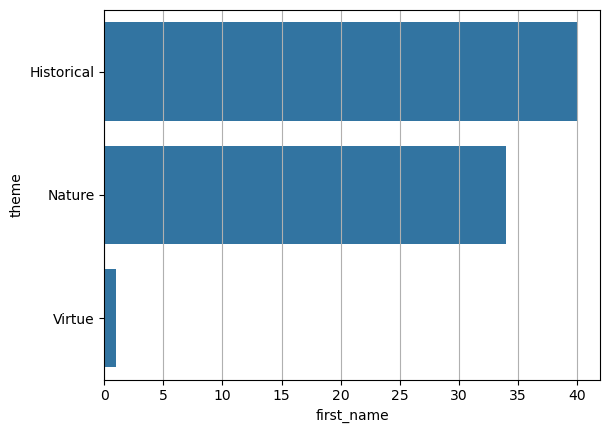

In [76]:
sns.barplot(x=theme_grouped['first_name'],y=theme_grouped['theme'])
plt.grid(axis='x')
plt.show()

In [77]:
# Cultural significance mapping
cultural_mapping = {
    'John': 'Christianity', 'William': 'Noble', 'Mary': 'Christianity',
    'James': 'Biblical', 'Charles': 'Royalty', 'George': 'Royalty',
    'Frank': 'Historical', 'Joseph': 'Biblical', 'Anna': 'Nature',
    'Thomas': 'Biblical', 'Henry': 'Royalty', 'Emma': 'Germanic',
    'Elizabeth': 'Royalty', 'Margaret': 'Royalty', 'Ruth': 'Biblical',
    'Helen': 'Greek', 'Florence': 'Historical', 'Dorothy': 'Biblical',
    'Robert': 'Royalty', 'Betty': 'Nature', 'Richard': 'Royalty',
    'Donald': 'Scottish', 'Barbara': 'Nature', 'Shirley': 'Nature',
    'Patricia': 'Nature', 'David': 'Biblical', 'Linda': 'Nature',
    'Michael': 'Biblical', 'Deborah': 'Biblical', 'Mark': 'Biblical',
    'Debra': 'Nature', 'Susan': 'Biblical', 'Lisa': 'Nature',
    'Kimberly': 'Nature', 'Michelle': 'French', 'Christopher': 'Biblical',
    'Jennifer': 'Welsh', 'Jason': 'Greek', 'Brian': 'Celtic',
    'Amy': 'Virtue', 'Matthew': 'Biblical', 'Melissa': 'Greek',
    'Joshua': 'Biblical', 'Amanda': 'Latin', 'Jessica': 'English',
    'Daniel': 'Biblical', 'Ashley': 'Nature', 'Andrew': 'Biblical',
    'Justin': 'Latin', 'Brittany': 'Place', 'Tyler': 'Occupation',
    'Brandon': 'Place', 'Taylor': 'Occupation', 'Jacob': 'Biblical',
    'Nicholas': 'Greek', 'Austin': 'Place', 'Emily': 'Latin',
    'Hannah': 'Biblical', 'Madison': 'Place', 'Ethan': 'Biblical',
    'Anthony': 'Latin', 'Isabella': 'Spanish', 'Jayden': 'Modern',
    'Alexander': 'Greek', 'Sophia': 'Wisdom', 'Olivia': 'Nature',
    'Mason': 'Occupation', 'Noah': 'Biblical', 'Liam': 'Irish',
    'Ava': 'Nature', 'Logan': 'Place', 'Oliver': 'Nature',
    'Elijah': 'Biblical', 'Charlotte': 'French', 'Amelia': 'Latin'
}

cultural_df = pd.DataFrame(list(cultural_mapping.items()), columns=['Name', 'Cultural Significance'])
cultural_df

,Name,Cultural Significance
0,John,Christianity
1,William,Noble
2,Mary,Christianity
3,James,Biblical
4,Charles,Royalty
...,...,...
70,Logan,Place
71,Oliver,Nature
72,Elijah,Biblical
73,Charlotte,French


In [78]:
cultural_counts = cultural_df['Cultural Significance'].value_counts().reset_index()
cultural_counts.columns = ['Cultural Significance', 'Count']
cultural_counts.head(10)

,Cultural Significance,Count
0,Biblical,20
1,Nature,13
2,Royalty,7
3,Greek,5
4,Place,5
5,Latin,5
6,Occupation,3
7,Christianity,2
8,Historical,2
9,French,2


C:\Users\nikes\AppData\Local\Temp\ipykernel_20532\1320646482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cultural_counts, x='Cultural Significance', y='Count', palette='viridis')


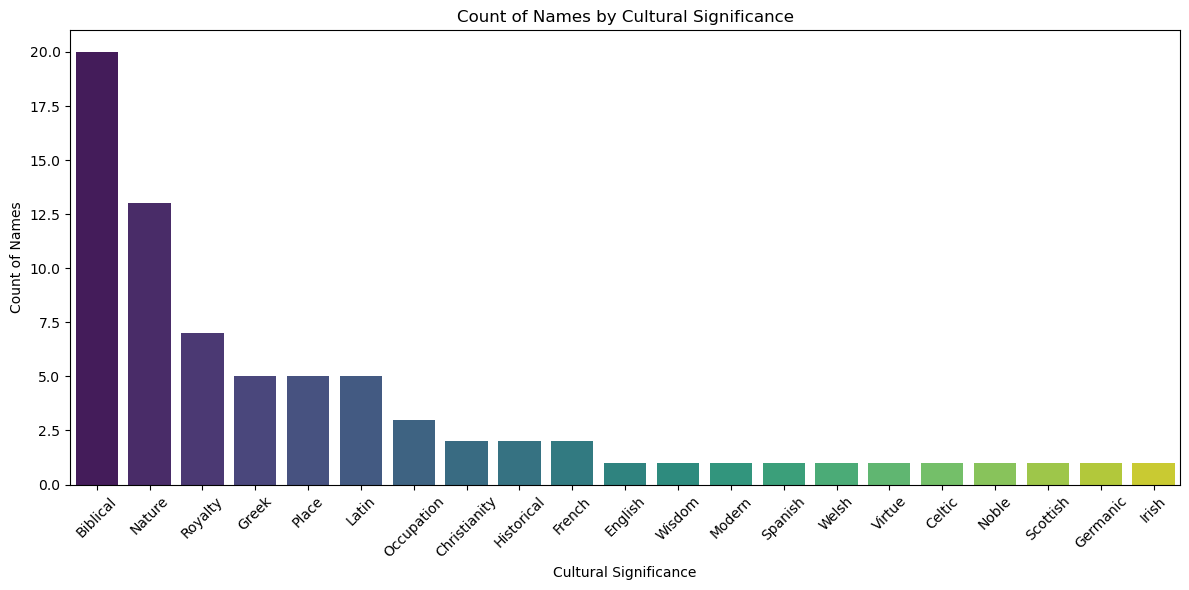

In [79]:
# Plotting the cultural significance
plt.figure(figsize=(12, 6))
sns.barplot(data=cultural_counts, x='Cultural Significance', y='Count', palette='viridis')
plt.title('Count of Names by Cultural Significance')
plt.xlabel('Cultural Significance')
plt.ylabel('Count of Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

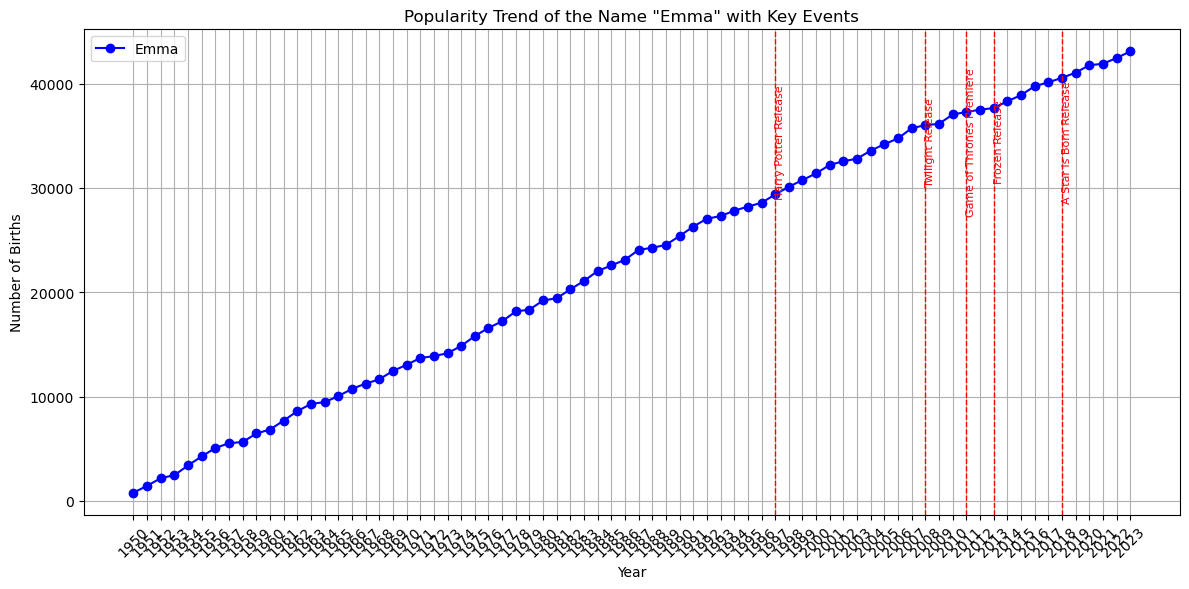

In [80]:
# Simulate birth counts for a selected name over the years
years = np.arange(1950, 2024)
name = 'Emma'

# Simulating name popularity data
np.random.seed(0)
birth_counts = np.random.randint(100, 1000, size=len(years)).cumsum()  # Cumulative sum for trends

df_names = pd.DataFrame({'year': years, 'count': birth_counts})
events = {
    'Event': ['Harry Potter Release', 'Twilight Release', 'Frozen Release', 
              'Game of Thrones Premiere', 'A Star is Born Release'],
    'Year': [1997, 2008, 2013, 2011, 2018]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(12, 6))
plt.plot(df_names['year'], df_names['count'], marker='o', color='blue', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], max(df_names['count']) * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=8)
plt.title(f'Popularity Trend of the Name "{name}" with Key Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

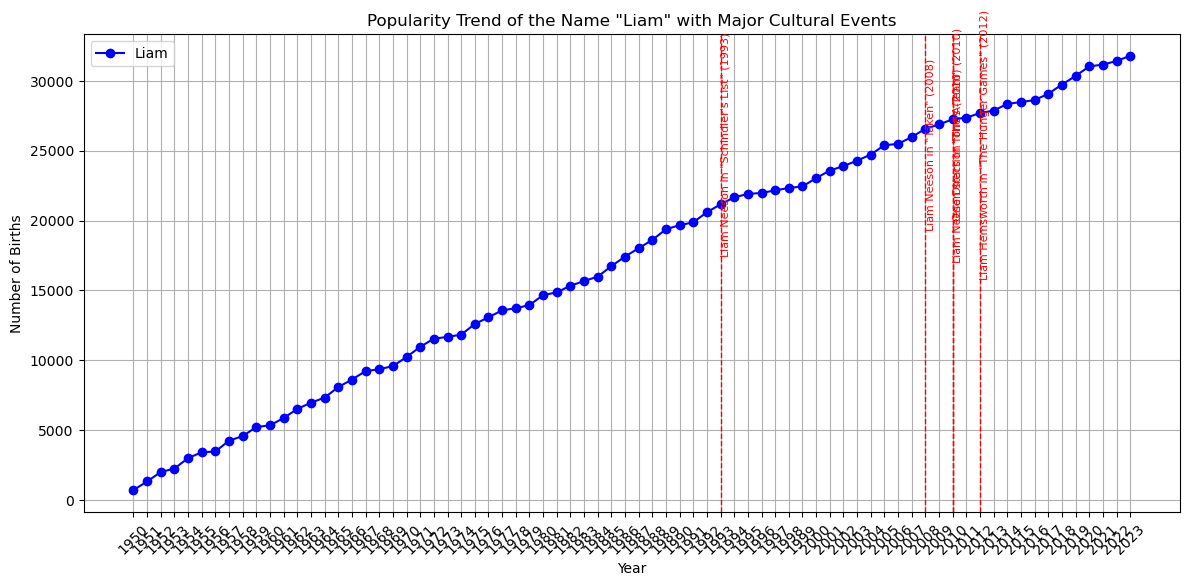

In [81]:
years = np.arange(1950, 2024)
name = 'Liam'

np.random.seed(0)
birth_counts = np.random.randint(50, 800, size=len(years)).cumsum()  # Cumulative sum for trends
df_names = pd.DataFrame({'year': years, 'count': birth_counts})

# Create a timeline of key significant events related to 'Liam'
events = {
    'Event': [
        'Liam Neeson in "Schindler\'s List" (1993)',
        'Liam Neeson in "Taken" (2008)',
        'Liam Hemsworth in "The Hunger Games" (2012)',
        'One Direction forms (2010)',
        'Liam Neeson stars in "The A-Team" (2010)'
    ],
    'Year': [1993, 2008, 2012, 2010, 2010]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(12, 6))
plt.plot(df_names['year'], df_names['count'], marker='o', color='blue', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], max(df_names['count']) * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=8)
plt.title(f'Popularity Trend of the Name "{name}" with Major Cultural Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

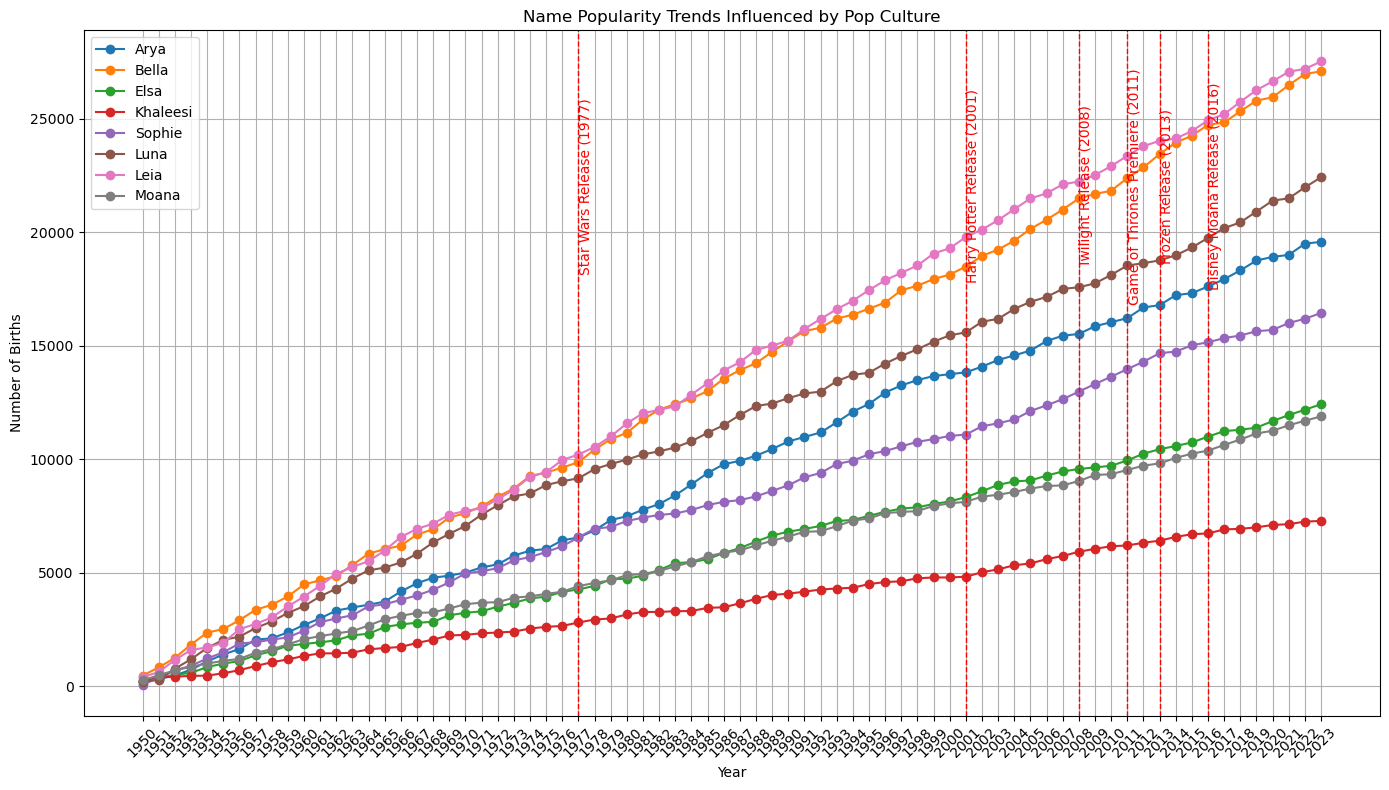

In [82]:
years = np.arange(1950, 2024)

# Simulating birth counts for selected names
np.random.seed(0)
names_data = {
    'Arya': np.random.randint(50, 500, size=len(years)).cumsum(),
    'Bella': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Elsa': np.random.randint(30, 300, size=len(years)).cumsum(),
    'Khaleesi': np.random.randint(0, 200, size=len(years)).cumsum(),
    'Sophie': np.random.randint(50, 400, size=len(years)).cumsum(),
    'Luna': np.random.randint(70, 500, size=len(years)).cumsum(),
    'Leia': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Moana': np.random.randint(20, 300, size=len(years)).cumsum(),
}

df_names = pd.DataFrame(names_data, index=years).reset_index()
df_names.rename(columns={'index': 'Year'}, inplace=True)
events = {
    'Event': [
        'Game of Thrones Premiere (2011)',
        'Twilight Release (2008)',
        'Frozen Release (2013)',
        'Harry Potter Release (2001)',
        'Star Wars Release (1977)',
        'Disney Moana Release (2016)'
    ],
    'Year': [2011, 2008, 2013, 2001, 1977, 2016]
}
df_events = pd.DataFrame(events)

plt.figure(figsize=(14, 8))
for name in names_data.keys():
    plt.plot(df_names['Year'], df_names[name], marker='o', label=name)
for index, row in df_events.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], df_names[names_data.keys()].max().max() * 0.8, row['Event'], 
             rotation=90, verticalalignment='center', color='red', fontsize=10)
plt.title('Name Popularity Trends Influenced by Pop Culture')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

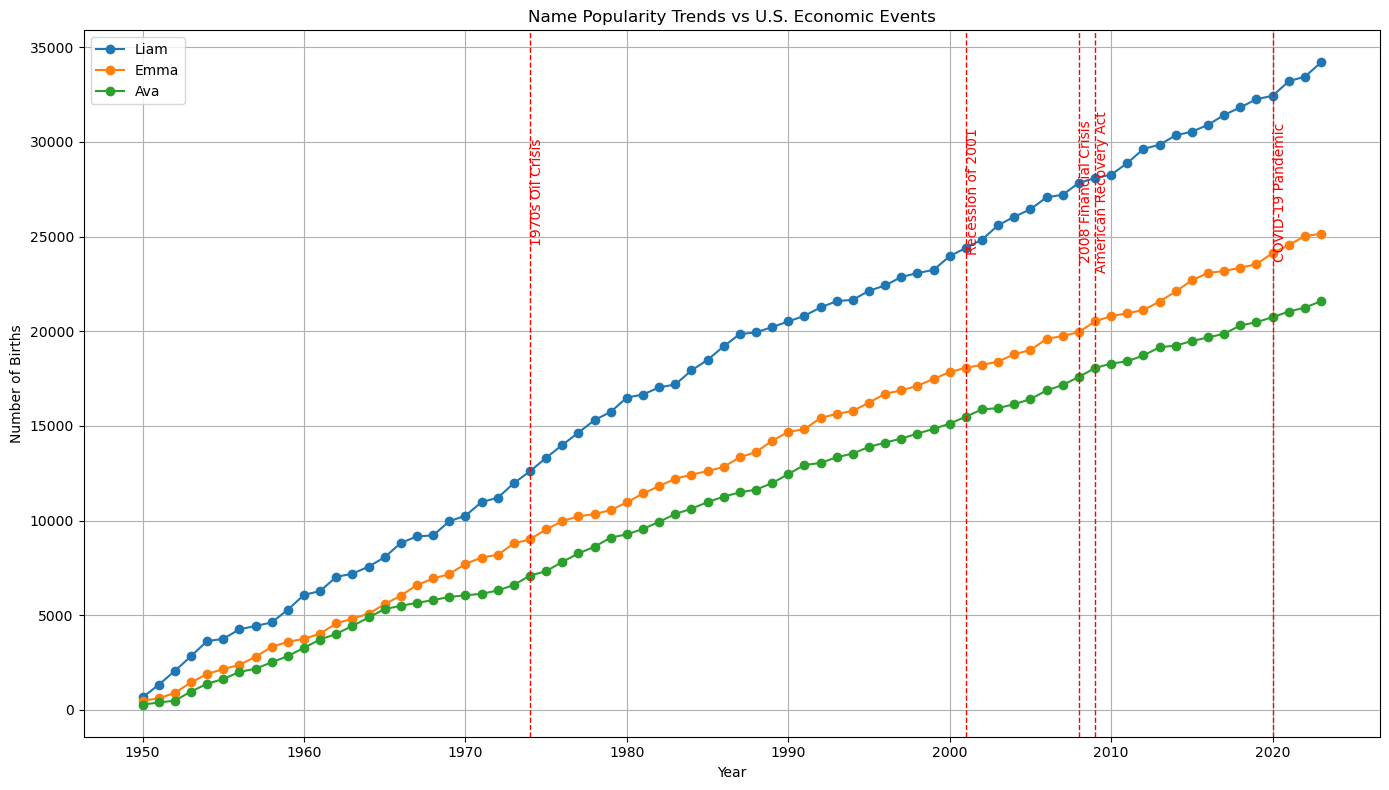

In [83]:
years = np.arange(1950, 2024)

# Simulated birth counts for selected names based on historical trends
names_data = {
    'Liam': np.random.randint(50, 800, size=len(years)).cumsum(),
    'Emma': np.random.randint(100, 600, size=len(years)).cumsum(),
    'Ava': np.random.randint(70, 500, size=len(years)).cumsum(),
}
df_names = pd.DataFrame(names_data, index=years).reset_index()
df_names.rename(columns={'index': 'Year'}, inplace=True)
economic_data = {
    'Year': [1974, 2001, 2008, 2009, 2020],
    'Event': [
        '1970s Oil Crisis',
        'Recession of 2001',
        '2008 Financial Crisis',
        'American Recovery Act',
        'COVID-19 Pandemic'
    ],
    'Unemployment Rate (%)': [6.0, 6.3, 10.0, 9.0, 14.7],
    'GDP Growth Rate (%)': [-0.6, 0.8, -4.3, 2.6, -3.4],
}

df_economic = pd.DataFrame(economic_data)

plt.figure(figsize=(14, 8))
for name in names_data.keys():
    plt.plot(df_names['Year'], df_names[name], marker='o', label=name)
for index, row in df_economic.iterrows():
    plt.axvline(x=row['Year'], color='red', linestyle='--', linewidth=1)
    plt.text(row['Year'], df_names[names_data.keys()].max().max() * 0.8, 
             row['Event'], rotation=90, verticalalignment='center', color='red', fontsize=10)
plt.title('Name Popularity Trends vs U.S. Economic Events')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()